<a href="https://colab.research.google.com/github/anzt/sunspot-arima/blob/main/Times_Series_Forecasting_menggunakan_ARIMA_sunspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ARIMA Projek/Data Sunspots.csv')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1/31/2000,133.1
1,1,2/29/2000,165.7
2,2,3/31/2000,217.7
3,3,4/30/2000,191.5
4,4,5/31/2000,165.9


In [ ]:
df['Date']= pd.to_datetime(df['Date'])
print(df)

     Unnamed: 0       Date  Monthly Mean Total Sunspot Number
0             0 2000-01-31                              133.1
1             1 2000-02-29                              165.7
2             2 2000-03-31                              217.7
3             3 2000-04-30                              191.5
4             4 2000-05-31                              165.9
..          ...        ...                                ...
248         248 2020-09-30                                0.6
249         249 2020-10-31                               14.4
250         250 2020-11-30                               34.0
251         251 2020-12-31                               21.8
252         252 2021-01-31                               10.4

[253 rows x 3 columns]


In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,2000-01-31,133.1
1,2000-02-29,165.7
2,2000-03-31,217.7
3,2000-04-30,191.5
4,2000-05-31,165.9


In [ ]:
df.columns=["Date","Sunspot"]
df.head()
df.describe()
df.set_index('Date', inplace=True)


<Axes: xlabel='Date'>

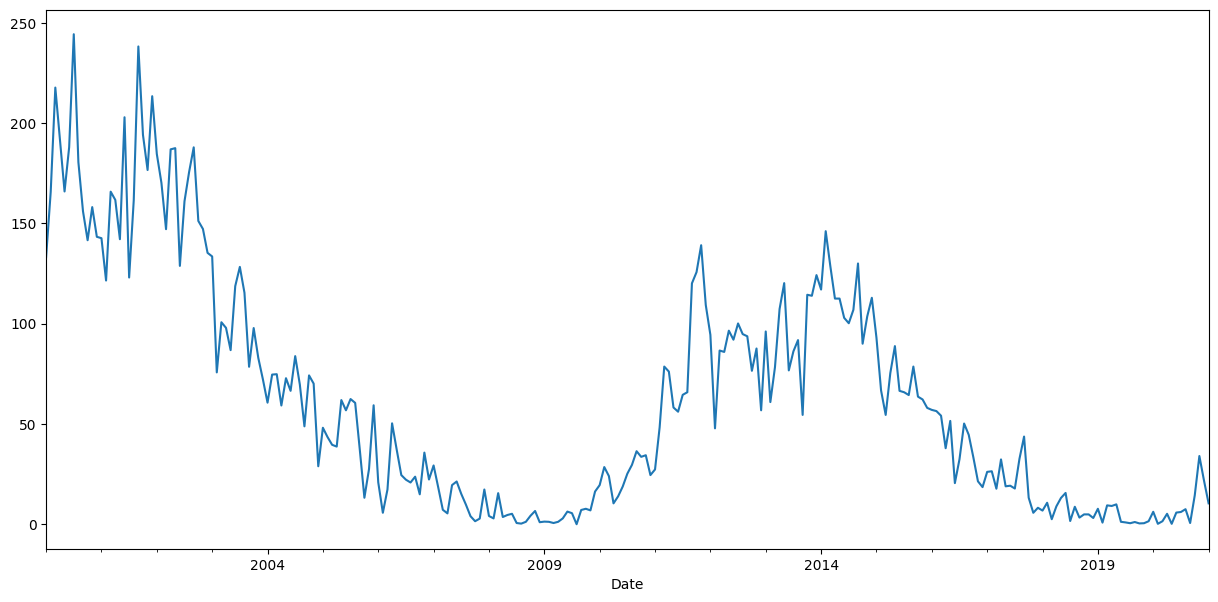

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Sunspot'].plot()

In [ ]:
# check stationary
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sunspot'])


In [ ]:
def adfuller_test(sunspot):
    result=adfuller(sunspot)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



In [ ]:
adfuller_test(df['Sunspot'])

ADF Test Statistic : -1.8826633586834522
p-value : 0.3402602467634987
#Lags Used : 11
Number of Observations : 241
weak evidence against null hypothesis,indicating it is non-stationary 


Here P-value is 0.34 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

In [ ]:
# See the first difference and seasonal difference
df['Sunspot First Difference'] = df['Sunspot'] - df['Sunspot'].shift(1)
df['Seasonal First Difference']=df['Sunspot'] - df['Sunspot'].shift(14)
df.head()

,Sunspot,Sunspot First Difference,Seasonal First Difference
Date,,,
2000-01-31,133.1,NaN,NaN
2000-02-29,165.7,32.6,NaN
2000-03-31,217.7,52.0,NaN
2000-04-30,191.5,-26.2,NaN
2000-05-31,165.9,-25.6,NaN


In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.9034201926119754
p-value : 0.04495171874349275
#Lags Used : 14
Number of Observations : 224
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Date'>

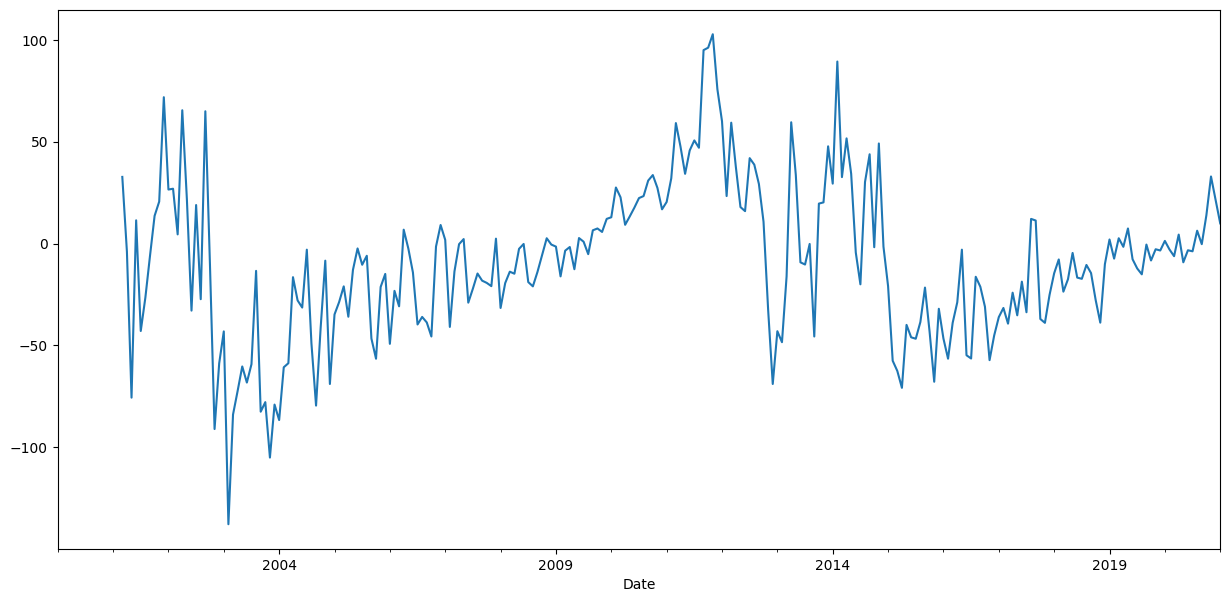

In [ ]:
df['Seasonal First Difference'].plot()

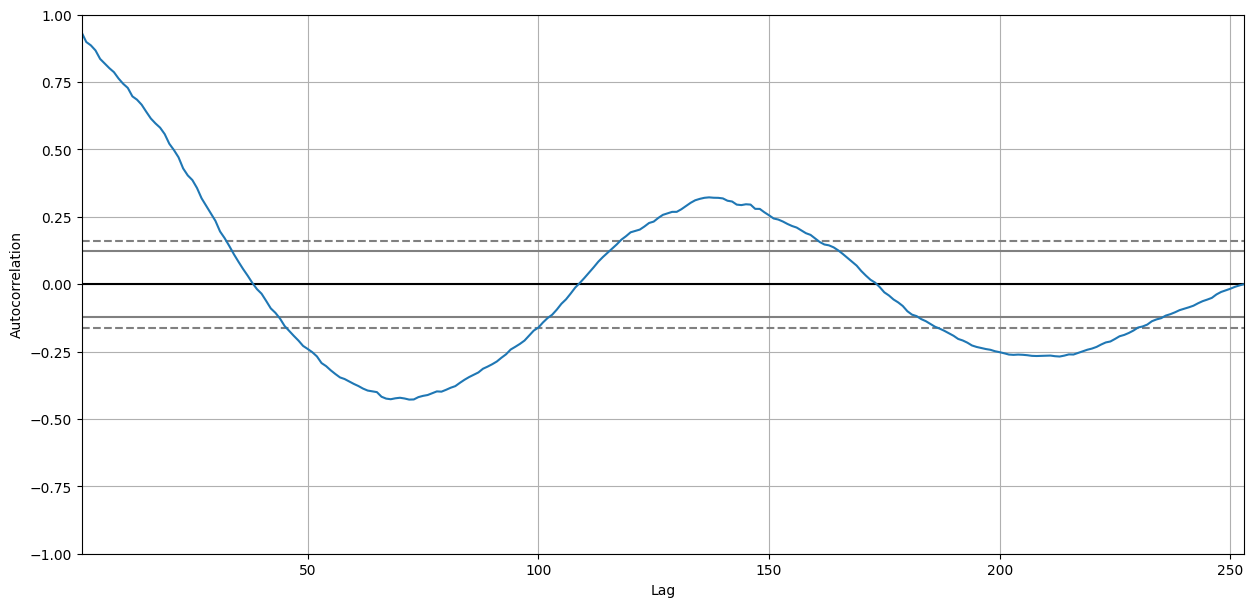

In [ ]:
# create auto-correlation :
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sunspot'])
plt.show()

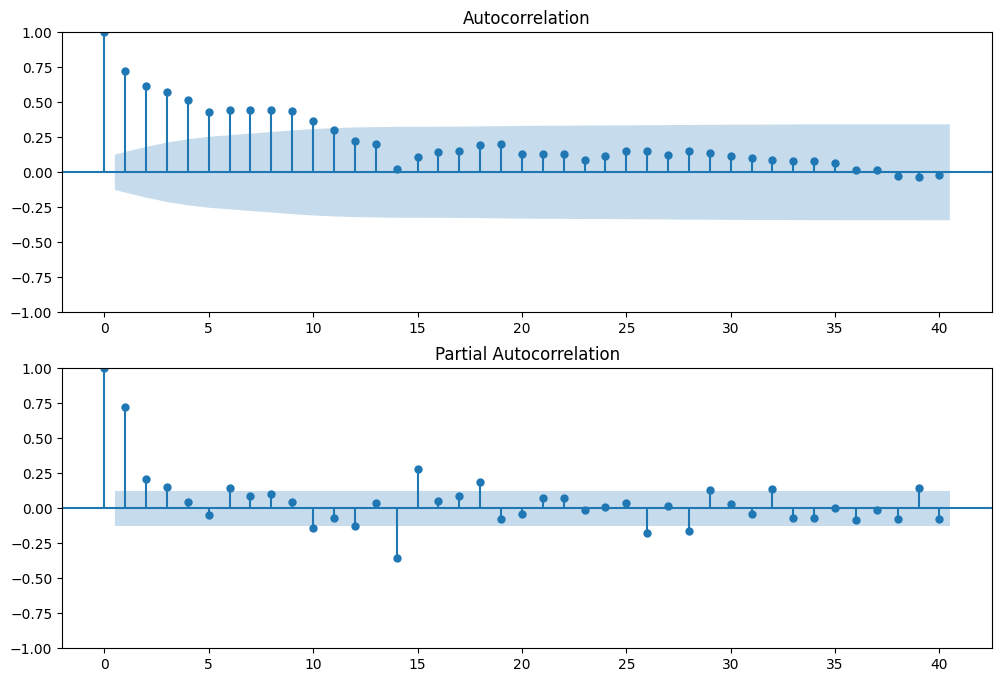

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [ ]:
#model=ARIMA(df['Sunspot'],order=(1,1,1))
model = sm.tsa.arima.ARIMA(df['Sunspot'], order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Sunspot   No. Observations:                  253
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1093.736
Date:                Sun, 24 Sep 2023   AIC                           2193.473
Time:                        15:09:58   BIC                           2204.061
Sample:                    01-31-2000   HQIC                          2197.733
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2436      0.098      2.479      0.013       0.051       0.436
ma.L1         -0.6749      0.081     -8.376      0.000      -0.833      -0.517
sigma2       344.2376     19.601     17.562      0.000     305.820     382.655
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               104.11
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

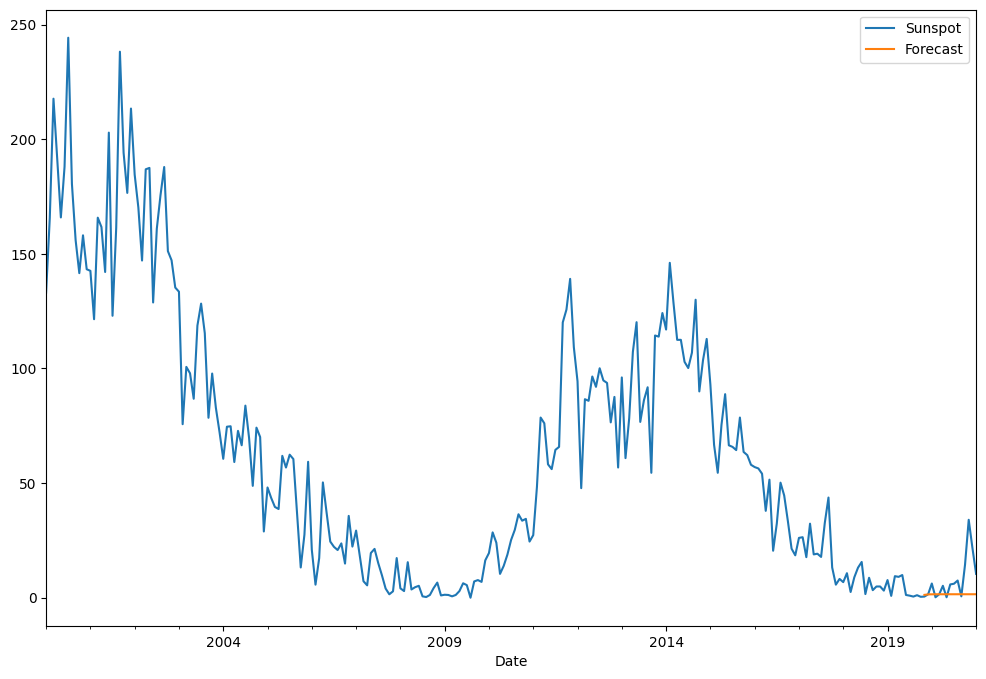

In [ ]:
df['Forecast']=model_fit.predict(start=238,end=252,dynamic=True)
df[['Sunspot','Forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

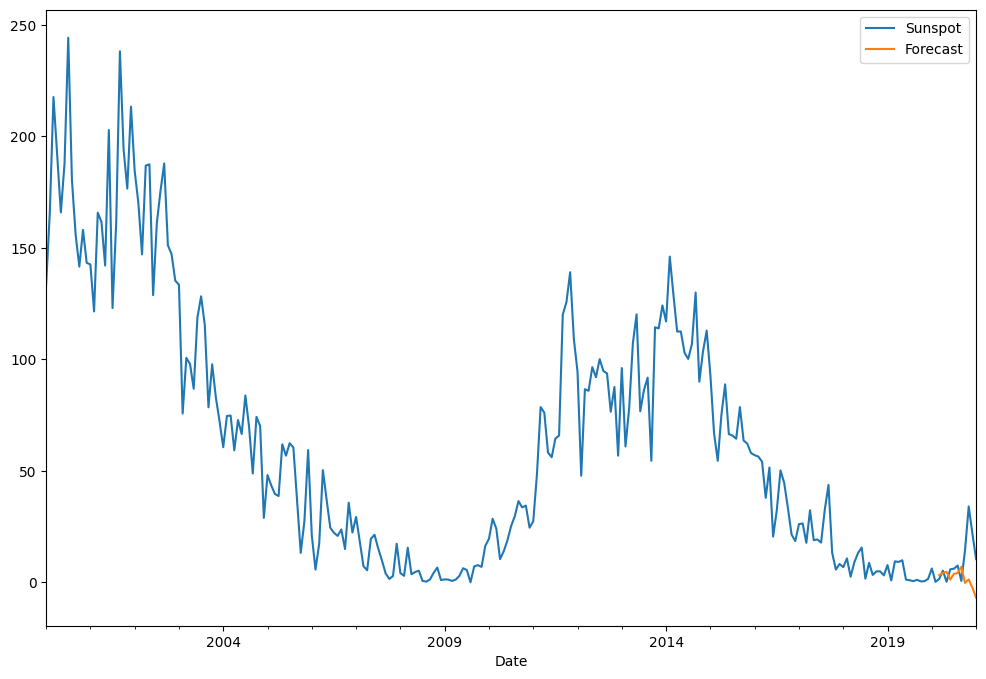

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sunspot'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['Forecast']=results.predict(start=242,end=252,dynamic=True)
df[['Sunspot','Forecast']].plot(figsize=(12,8))

<Axes: >

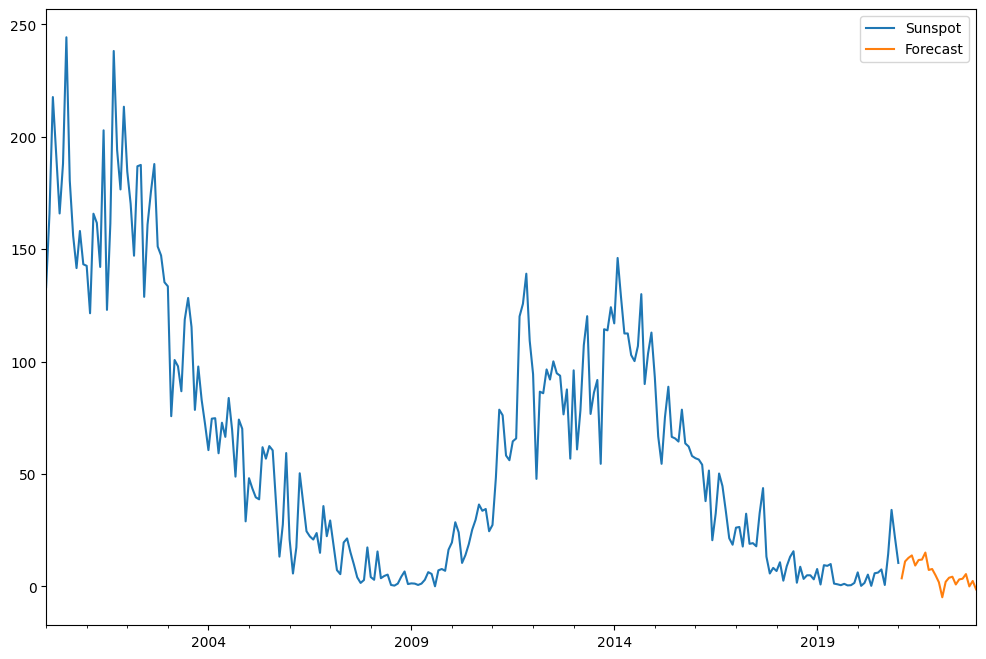

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['Forecast'] = results.predict(start = 253, end = 277, dynamic= True)
future_df[['Sunspot', 'Forecast']].plot(figsize=(12, 8))

In [ ]:
future_datest_df.tail()

,Sunspot,Sunspot First Difference,Seasonal First Difference,Forecast
2022-08-31,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,NaN
2022-11-30,NaN,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN,NaN


In [ ]:
future_df.to_csv('future_df.csv')